# **1. Data Preprocessing**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
! unzip /content/iris.zip

Archive:  /content/iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [3]:
df = pd.read_csv("/content/iris.data", names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

# **Data exploration**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [8]:
df.shape

(150, 5)

In [9]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [10]:
df.duplicated().sum()

3

In [11]:
df.drop_duplicates(inplace=True)

# **Data visualization**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


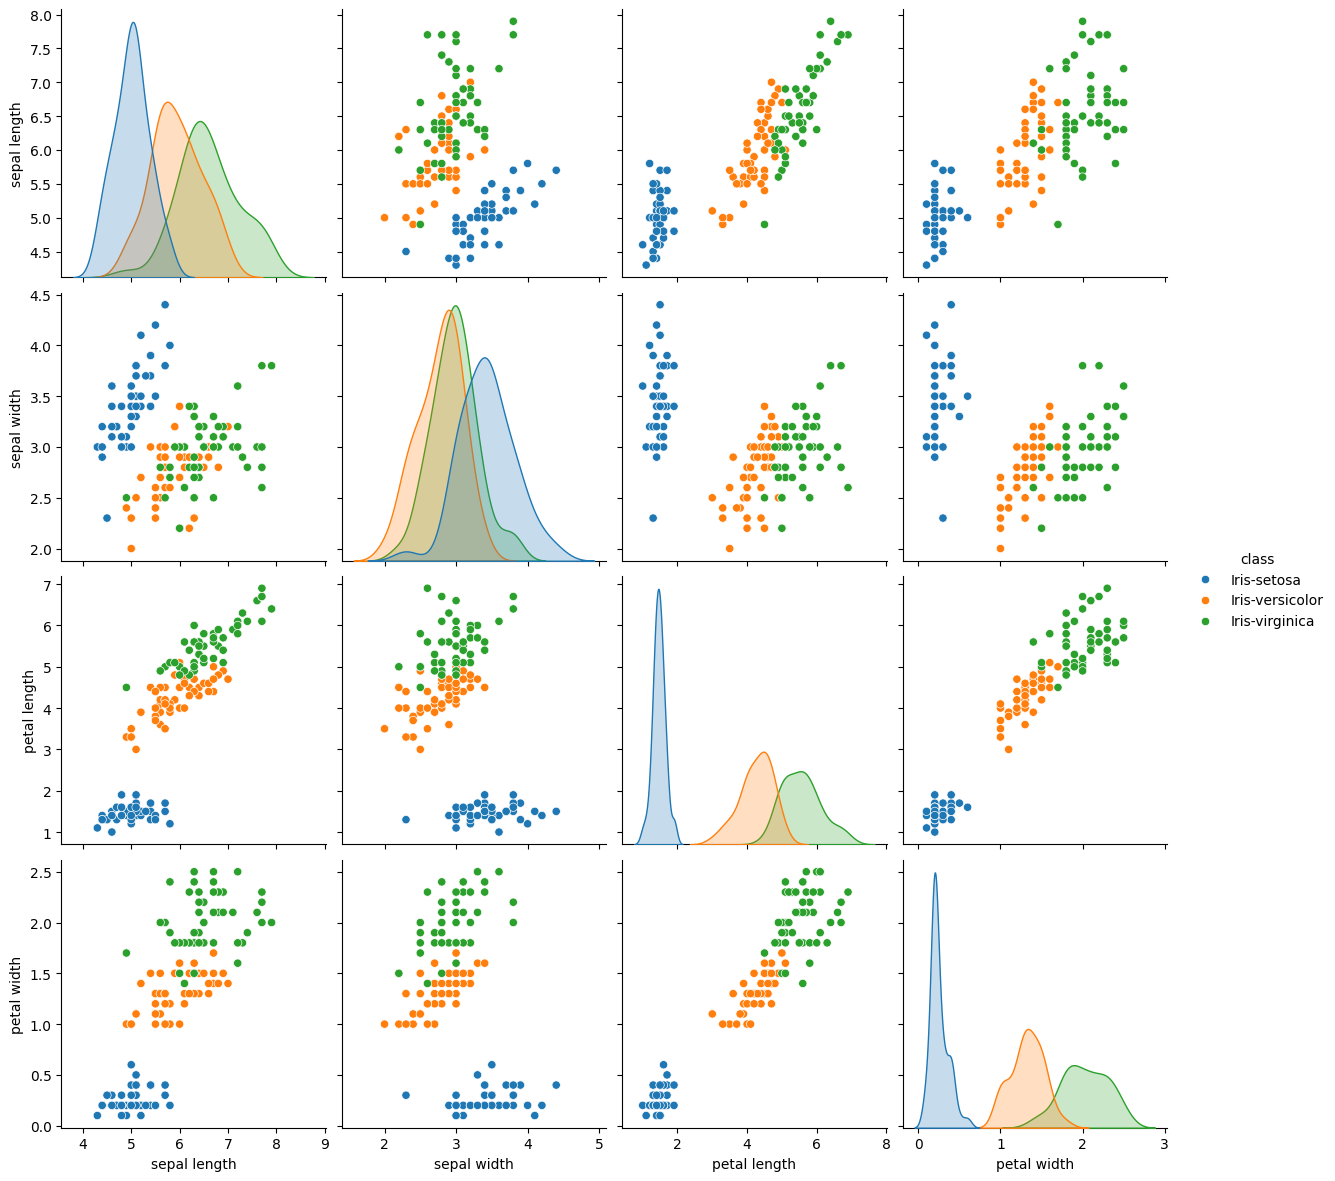

In [12]:
sns.pairplot(df,hue="class", size= 3)

                 petal length  petal width
class                                     
Iris-setosa          1.462500     0.250000
Iris-versicolor      4.260000     1.326000
Iris-virginica       5.561224     2.028571


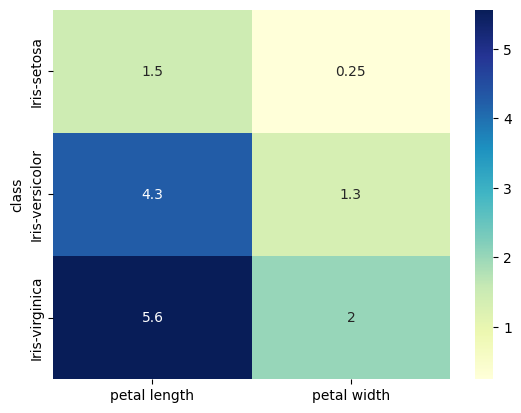

<Figure size 800x600 with 0 Axes>

In [13]:
s= df.groupby("class").agg({"petal length":'mean',"petal width":'mean' })
print(s)
sns.heatmap(s,annot= True, cmap="YlGnBu")
plt.figure(figsize=(8,6))
plt.show()

In [14]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

<ipython-input-15-98a1f2e41ace>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="class", y="petal length", palette="rocket")


<Axes: xlabel='class', ylabel='petal length'>

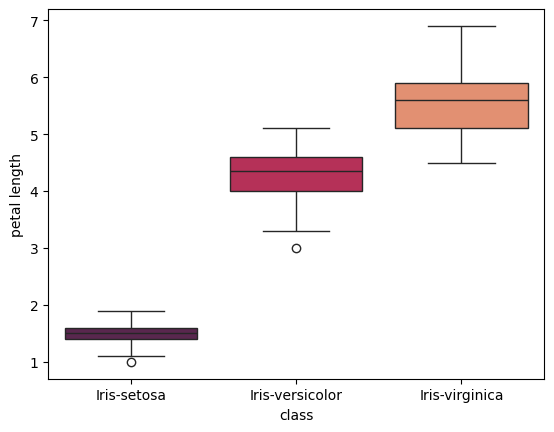

In [15]:
sns.boxplot(data=df, x="class", y="petal length", palette="rocket")

<ipython-input-16-b6951ade7e37>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="class", y="petal width",


<Axes: xlabel='class', ylabel='petal width'>

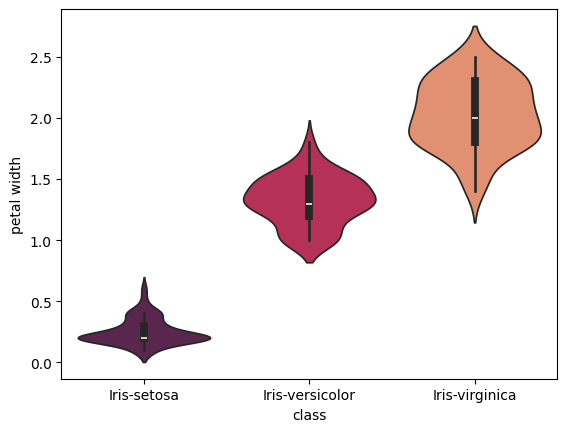

In [16]:
sns.violinplot(data=df, x="class", y="petal width",
                palette="rocket")

                 sepal width  sepal length  petal length
class                                                   
Iris-setosa         3.431250      5.010417      1.462500
Iris-versicolor     2.770000      5.936000      4.260000
Iris-virginica      2.979592      6.604082      5.561224


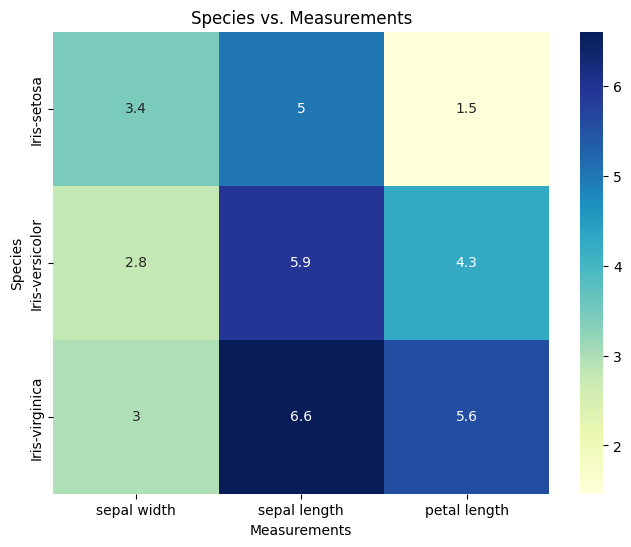

In [17]:
grouped = df.groupby(["class"]).agg({"sepal width":'mean', "sepal length":'mean',"petal length":'mean'})
print(grouped)
plt.figure(figsize=(8,6))
sns.heatmap(grouped, annot=True, cmap="YlGnBu")
plt.title("Species vs. Measurements")
plt.xlabel("Measurements")
plt.ylabel("Species")
plt.show()

                 sepal width  sepal length  petal width  petal length
class                                                                
Iris-setosa         3.431250      5.010417     0.250000      1.462500
Iris-versicolor     2.770000      5.936000     1.326000      4.260000
Iris-virginica      2.979592      6.604082     2.028571      5.561224


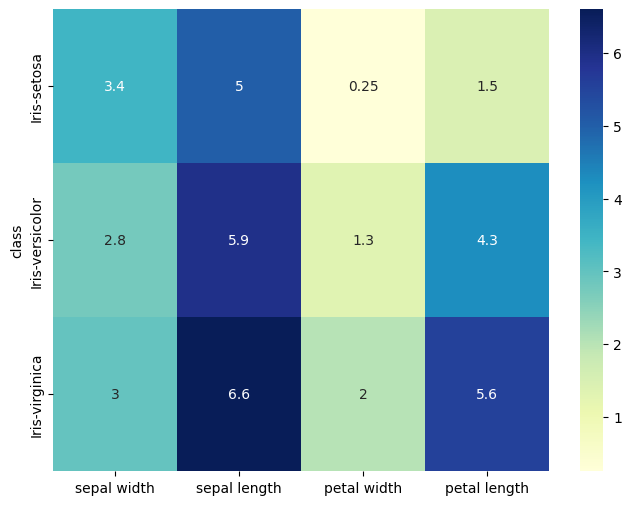

In [18]:
c= df.groupby("class").agg({"sepal width":'mean',"sepal length":'mean' ,"petal width":'mean' , "petal length":'mean'})
print(c)
plt.figure(figsize=(8,6))
sns.heatmap(c,annot= True,cmap="YlGnBu")
plt.show()

# **Split**

In [19]:
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **2. Unsupervised Learning: Clustering and Outlier Detection**

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

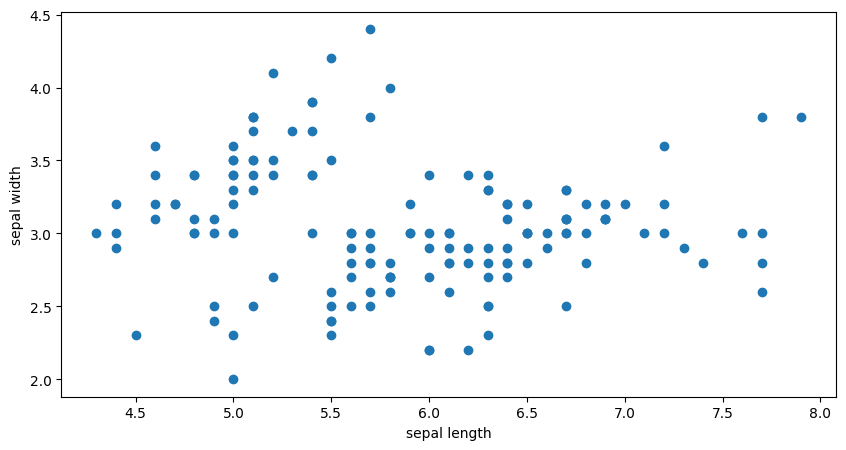

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(x= X['sepal length'], y=X['sepal width'])
plt.xlabel('sepal length')
plt.ylabel('sepal width');

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

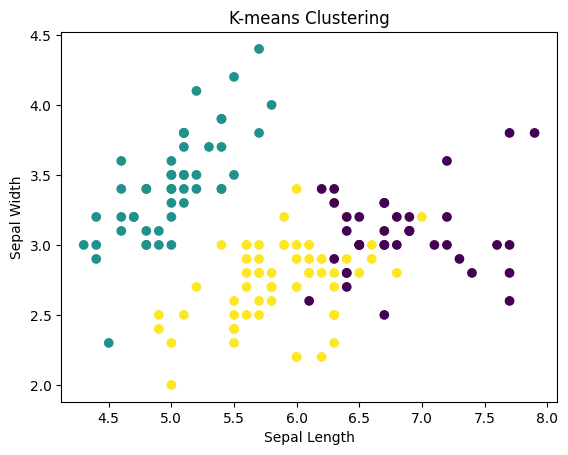

In [23]:
plt.scatter(X["sepal length"], X["sepal width"], c=kmeans.labels_, cmap='viridis')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-means Clustering")
plt.show()

In [24]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = dbscan.fit_predict(X)
print("Number of outliers detected:", sum(outlier_labels == -1))

Number of outliers detected: 17


In [25]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5509780950891296


# **3. Supervised Learning: Baseline Model**

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [29]:
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9333333333333333


In [30]:
pred = model.predict(X_train)
accuracy = accuracy_score(y_train, pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9829059829059829


# **4. Model Comparison**

In [60]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [61]:
models = {
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [62]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} Mean Accuracy: {scores.mean()}")

Support Vector Machine Mean Accuracy: 0.9655797101449275
Random Forest Mean Accuracy: 0.9659420289855072
Gradient Boosting Mean Accuracy: 0.9572463768115942


In [66]:
best_model_name = max(models, key=lambda k: cross_val_score(models[k], X_train, y_train, cv=5, scoring='accuracy').mean())
best_model = models[best_model_name]
print("Best Performing Algorithm:", best_model_name)

Best Performing Algorithm: Random Forest


# **5. Model Tuning and Ensemble**

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

In [36]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 5, 6, 7, 8],
}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [68]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 4, 'n_estimators': 50}


In [37]:
tuned_model = grid_search.best_estimator_

In [38]:
tuned_pred = tuned_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_pred)
print("Tuned Model Accuracy:", tuned_accuracy)

Tuned Model Accuracy: 0.9333333333333333


In [39]:
ensemble_model = VotingClassifier(estimators=list(models.items()), voting='hard')
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('Support Vector Machine', SVC(random_state=42)),
                             ('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(random_state=42))])

In [40]:
ensemble_pred = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Model Accuracy:", ensemble_accuracy)

Ensemble Model Accuracy: 0.9333333333333333


In [70]:
if tuned_accuracy > ensemble_accuracy:
    print("The tuned model performs better.")
elif tuned_accuracy < ensemble_accuracy:
    print("The ensemble model performs better.")
else:
    print("Both models have the same performance.")

Both models have the same performance.
